# Segmenting and Clustering Neighborhoods in Toronto

# Solution 1
*****
1) The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
2) Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
3) Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
4) In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

### Importing libraries required

In [1]:
import types
import pandas as pd
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9ef5d8cc2f154708aa8978933e9670c9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='74TT-Fpv90uOYMYMkz9z2TQHJSuDWj6pfTLolcr-3FK6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9ef5d8cc2f154708aa8978933e9670c9.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-ngvlukz1zao0vz',Key='Toronto.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Filtering data frame to have only assigned borough and Ignore cells with a borough that is Not assigned

In [2]:
df_filtered =df_data_1[df_data_1['Borough'] != 'Not assigned'].reset_index(drop=True)

In [3]:
df_filtered.head(10)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
df_filtered.shape

(103, 3)

# Solution 2
******
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

### Loading Latitude and Longitude on to a dataframe

In [5]:

body = client_9ef5d8cc2f154708aa8978933e9670c9.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-ngvlukz1zao0vz',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Joining /  Merging both dataframes on Postal Code

In [6]:
df_filtered = df_filtered.join(df_data_2.set_index('Postal Code'), on='Postal Code')

In [7]:
df_filtered.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [8]:
print('The dataframe has {} boroughs and {} neighbourhood.'.format(
        len(df_filtered['Borough'].unique()),
        df_filtered.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighbourhood.


# Solution 3
*****

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make.
to generate maps to visualize your neighborhoods and how they cluster together

### Filtered data where Borough contains "Toronto"

In [9]:
df_filtered= df_filtered[df_filtered['Borough'].str.contains("Toronto")].reset_index(drop=True)

In [10]:
df_filtered.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [11]:
df_filtered.groupby('Borough').count()

,Postal Code,Neighbourhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
West Toronto,6,6,6,6


In [12]:
df_filtered.shape

(39, 5)

### Getting coordinates for Toronto

In [13]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top.

In [14]:
# create map of Manhattan using latitude and longitude values
map_torn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_filtered['Latitude'], df_filtered['Longitude'], df_filtered['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torn)  
    
map_torn

In [15]:
df_filtered.loc[4, 'Neighbourhood']

'The Beaches'

#### Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = '40ABELL2KJ4QKL1KZSUCEKNLXLI0L32EN1HE3MQWU1ZK5YGV' # your Foursquare ID
CLIENT_SECRET = 'PXKPQQRB0BDRB5TXJHR15S3D2LWAHY0LZ5NA5QLOWQNMCJD4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 40ABELL2KJ4QKL1KZSUCEKNLXLI0L32EN1HE3MQWU1ZK5YGV
CLIENT_SECRET:PXKPQQRB0BDRB5TXJHR15S3D2LWAHY0LZ5NA5QLOWQNMCJD4


Get the neighborhood's name, latitude and longitude values.

In [17]:
neighborhood_latitude = df_filtered.loc[4, 'Latitude'] # neighbourhood latitude value
neighborhood_longitude = df_filtered.loc[4, 'Longitude'] # neighbourhood longitude value

neighborhood_name = df_filtered.loc[4, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


#### Now, let's get the top 100 venues that are in The Beaches within a radius of 500 meters.

In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=40ABELL2KJ4QKL1KZSUCEKNLXLI0L32EN1HE3MQWU1ZK5YGV&client_secret=PXKPQQRB0BDRB5TXJHR15S3D2LWAHY0LZ5NA5QLOWQNMCJD4&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

### Send the GET request and examine the results

In [19]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f396192407e071762de486e'},
 'response': {'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.680857404499996,
    'lng': -79.28682091449052},
   'sw': {'lat': 43.67185739549999, 'lng': -79.29924148550948}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bd461bc77b29c74a07d9282',
       'name': 'Glen Manor Ravine',
       'location': {'address': 'Glen Manor',
        'crossStreet': 'Queen St.',
        'lat': 43.67682094413784,
        'lng': -79.29394208780985,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.67682094413784,
          'lng': -79.29394208780985}],
        'distanc

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now we clean the json and structure it into a *pandas* dataframe.

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [22]:
print('{} venues were returned by Foursquare for Neighbourhood "{}"'.format(nearby_venues.shape[0],neighborhood_name))

4 venues were returned by Foursquare for Neighbourhood "The Beaches"


#### Let's get all venues for all the neighborhoods in Toronto

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
Toronto_venues = getNearbyVenues(names=df_filtered['Neighbourhood'],
                                   latitudes=df_filtered['Latitude'],
                                   longitudes=df_filtered['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [25]:
print(Toronto_venues.shape)
Toronto_venues.head()

(1630, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


### To know how many venues were returned for each neighborhood

In [26]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,59,59,59,59,59,59
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,62,62,62,62,62,62
Christie,17,17,17,17,17,17
Church and Wellesley,76,76,76,76,76,76
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


#### Following tells us how many unique categories can be curated from all the returned venues

In [27]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


### Below analyze the neighbourhoods

In [28]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Toronto_onehot.shape

(1630, 234)

### Below to get group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [30]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.016949,0.000000,0.000000,0.000000,0.000000,0.00
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Business reply mail Processing Centre, South C...",0.058824,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Central Bay Street,0.016129,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.016129,0.000000,0.000000,0.016129,0.000000,0.00
5,Christie,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Church and Wellesley,0.026316,0.013158,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.013158,...,0.013158,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.040000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.00
8,Davisville,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.028571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Davisville North,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


In [31]:
Toronto_grouped.shape

(39, 234)

### Let's print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 5

for hood in Toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Toronto_grouped[Toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.08
1     Cheese Shop  0.03
2  Farmers Market  0.03
3          Bakery  0.03
4      Restaurant  0.03


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1  Breakfast Spot  0.09
2     Coffee Shop  0.09
3             Gym  0.04
4             Bar  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
            venue  freq
0     Yoga Studio  0.06
1      Restaurant  0.06
2      Skate Park  0.06
3  Farmers Market  0.06
4   Burrito Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.12
1   Airport Service  0.12
2  Airport Terminal  0.12
3          Boutique  0.06
4   Harbor / Marina  0.06


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.05
2  Italian R

### Execute below for sorting the venues in descending order

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Below cell to create the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Farmers Market,Bakery,Restaurant,Cheese Shop,Café,Beer Bar,Italian Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Stadium,Burrito Place,Restaurant,Climbing Gym,Pet Store,Gym
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Pizza Place,Skate Park,Brewery,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Butcher,Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Boat or Ferry,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Boutique,Harbor / Marina
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Department Store,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Salad Place,Indian Restaurant


In [35]:
#import k-means from clustering stage
from sklearn.cluster import KMeans

### Below to cluster the neighborhood into 5 clusters.

In [36]:
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3], dtype=int32)

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted = neighborhoods_venues_sorted.rename(columns={"Neighborhood": "Neighbourhood"})

Toronto_merged = df_filtered

Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Toronto_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Theater,Mexican Restaurant,Shoe Store,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,College Cafeteria,Gym,Distribution Center,Portuguese Restaurant,Persian Restaurant,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Bubble Tea Shop,Cosmetics Shop,Diner,Lingerie Store,Italian Restaurant,Ramen Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cosmetics Shop,Restaurant,Cocktail Bar,Clothing Store,American Restaurant,Italian Restaurant,Seafood Restaurant,Hotel
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Pub,Health Food Store,Trail,Women's Store,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant


### Below cell will plot the clusters on the Map

In [38]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighbourhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

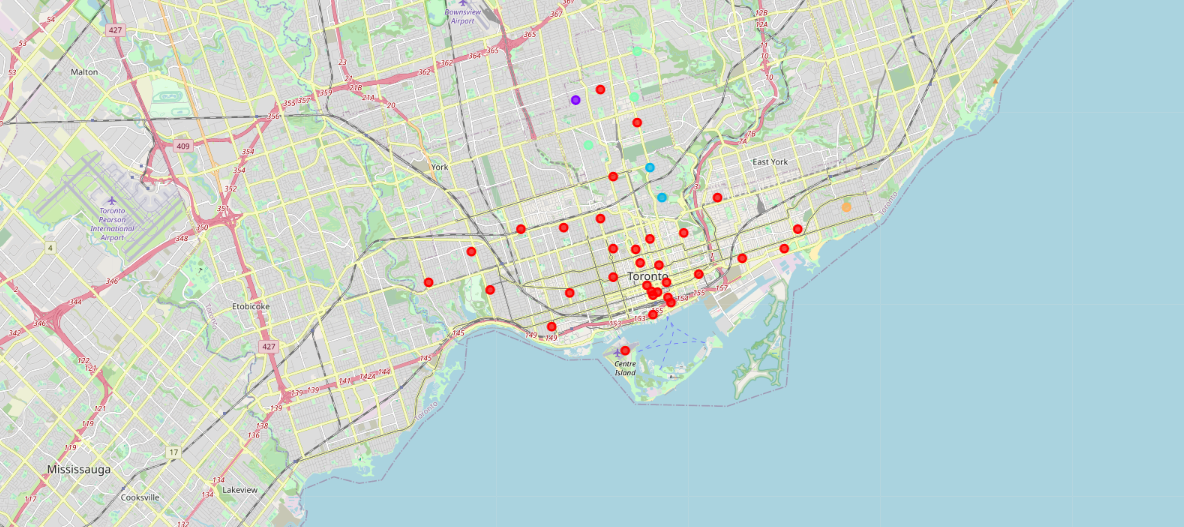

### Below Cell populates Cluster 1 with various venue categories in it. 

In [39]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Park,Bakery,Café,Pub,Breakfast Spot,Theater,Mexican Restaurant,Shoe Store,Restaurant
1,Downtown Toronto,0,Coffee Shop,College Cafeteria,Gym,Distribution Center,Portuguese Restaurant,Persian Restaurant,Park,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Bubble Tea Shop,Cosmetics Shop,Diner,Lingerie Store,Italian Restaurant,Ramen Restaurant
3,Downtown Toronto,0,Coffee Shop,Café,Cosmetics Shop,Restaurant,Cocktail Bar,Clothing Store,American Restaurant,Italian Restaurant,Seafood Restaurant,Hotel
5,Downtown Toronto,0,Coffee Shop,Seafood Restaurant,Cocktail Bar,Farmers Market,Bakery,Restaurant,Cheese Shop,Café,Beer Bar,Italian Restaurant
6,Downtown Toronto,0,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Department Store,Bubble Tea Shop,Burger Joint,Japanese Restaurant,Salad Place,Indian Restaurant
7,Downtown Toronto,0,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Candy Store,Italian Restaurant,Diner,Nightclub,Coffee Shop
8,Downtown Toronto,0,Coffee Shop,Clothing Store,Café,Restaurant,Hotel,Gym,Steakhouse,Thai Restaurant,Bar,Sushi Restaurant
9,West Toronto,0,Bakery,Pharmacy,Supermarket,Middle Eastern Restaurant,Grocery Store,Park,Gym / Fitness Center,Brewery,Bank,Bar
10,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Italian Restaurant,Fried Chicken Joint,Restaurant,Scenic Lookout,History Museum


### Below Cell populates Cluster 2 with various venue categories in it. 

In [40]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,1,Garden,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


### Below Cell populates Cluster 3 with various venue categories in it. 

In [41]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,2,Park,Trail,Lawyer,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
33,Downtown Toronto,2,Park,Playground,Trail,Cupcake Shop,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


### Below Cell populates Cluster 4 with various venue categories in it. 

In [42]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,3,Park,Swim School,Bus Line,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
20,Central Toronto,3,Park,Pizza Place,Breakfast Spot,Food & Drink Shop,Sandwich Place,Hotel,Department Store,Deli / Bodega,Dumpling Restaurant,Donut Shop
21,Central Toronto,3,Bus Line,Park,Jewelry Store,Trail,Sushi Restaurant,Women's Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


### Below Cell populates Cluster 5 with various venue categories in it. 

In [43]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4, Toronto_merged.columns[[1] + list(range(5, Toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East Toronto,4,Pub,Health Food Store,Trail,Women's Store,Distribution Center,Department Store,Dessert Shop,Diner,Discount Store,Doner Restaurant


# That is all in this Notebook on Toronto Segmenting and Clustering of Neighbourhoods